# Context and description of the data

#### 1. Background information on the subject and field of study

The data explores the sleep disorders by interviewing people on their sleeping behaviors. The variables include people’s usual sleep time and wake time during weekdays, their sleep hours, and also behavior variables such as how frequent do people snore, snort or stop breathing during the sleep cycle, how often do they feel very sleepy during the day time, as well as whether they have consulted a doctor about their sleeping problem. In this project, we will study and assess which variables will be more likely to cause sleep disorders and construct a logistic regression model to predict whether people will see doctors for sleep disorders. We also try to classify people in 3 different clusters based on their self-reported sleeping habits. 

#### 2. Information about data collection.

The data had been collected by Centers for Disease Control and Prevention from 2015 to 2016 and it was published in March 2018. The method used in data collection was interview through the Computer-Assisted Personal Interview (CAPI) system, by which trained interviewers asked questions with regards to sleep disorders at homes of participants. All interviewees were at least sixteen-year old when they participated the interviews. Given that the responses were self-reported by participants, the results might not represent authentic sleeping performances, leading to biased and skewed information. For instance, people might be less willing to report that they have serious problems with sleeping. The dataset might have fewer people who have visited doctors for sleep disorders than the reality. 

Data Dictionary: https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/SLQ_I.htm

Data File: https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/SLQ_I.XPT

# Exploratory Analysis of the Data

#### 1. Data Cleaning

* Rename each column.
* Drop all NA (missing value).
* Manually delete data points of 'Refused' or 'Don't know'.
* Round variables 'Snore', 'Snort', and 'Sleep' to nearest integer.
* Transform variable Doctor so that value 1 indicates seeing doctors and value 0 indicates not seeing doctors.
* Transform variables SleepTime and WakeTime as to be in regular format.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
SLQ = pd.read_sas('SLQ_I.XPT')
SLQ.columns = ['Respondent','SleepTime','WakeTime','SleepHours','Snore','Snort','Doctor','Sleepy']
SLQ = SLQ.dropna(axis=0, how='any')

SLQ=SLQ[(SLQ['Snore']<7) & (SLQ['Snort']<7) & (SLQ['Doctor']<7) &  (SLQ['Sleepy']<7)]

SLQ['Snore'] = np.round_(SLQ['Snore'], decimals=0)
SLQ['Snort'] = np.round_(SLQ['Snort'], decimals=0)
SLQ['Sleepy'] = np.round_(SLQ['Sleepy'], decimals=0)

Doc = {1:1,2:0}
SLQ['Doctor'] = SLQ['Doctor'].map(Doc)

SLQ.SleepTime = SLQ.SleepTime.str.decode('utf-8')
SLQ.WakeTime = SLQ.WakeTime.str.decode('utf-8')
SLQ.head()

,Respondent,SleepTime,WakeTime,SleepHours,Snore,Snort,Doctor,Sleepy
1,83733.0,23:00,07:00,8.0,1.0,0.0,0,0.0
5,83737.0,21:00,06:00,9.0,3.0,0.0,0,1.0
6,83741.0,23:00,05:30,6.5,0.0,0.0,0,1.0
7,83742.0,22:30,06:30,8.0,1.0,0.0,0,0.0
8,83743.0,00:00,06:30,6.5,0.0,0.0,0,3.0


In [3]:
SLQ.shape

(5648, 8)

#### 2. Summary Statistics and the distributional shape of selected variables in the data

Here we generated the summary statistics for the dataset. 

In addition, we ploted the density of the numerical variable SleepHours, which displayed a roughly normal distributional shape.

In [4]:
SLQ.drop('Respondent',axis=1).describe()

,SleepHours,Snore,Snort,Doctor,Sleepy
count,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000
mean,7.782932,1.358888,0.399965,0.248761,1.744157
std,1.553279,1.165098,0.811145,0.432333,1.184974
min,2.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,0.000000,1.000000
50%,8.000000,1.000000,0.000000,0.000000,2.000000
75%,8.500000,2.000000,0.000000,0.000000,3.000000
max,14.500000,3.000000,3.000000,1.000000,4.000000


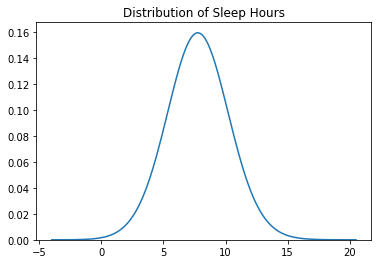

In [5]:
sns.kdeplot(SLQ.SleepHours, bw=2, legend=False)
plt.title('Distribution of Sleep Hours');

#### 3. Transform variables

We transformed SleepTime and WakeTime to float type. For example, if the time in the data set is 20:30, it will be transformed to a float type 2030. For SleepTime, we wanted to indicate how late people sleep if the time is after 00:00. We modified the time between 0000 and 1400 by adding 2400 so that the value would be consistent with how late people sleep.

In [6]:
newSleepTime=[]
for hr,mins in np.array(SLQ.SleepTime.str.split(':')):
    newSleepTime.append(int(hr)*100+int(mins))

newWakeTime=[]
for hr,mins in np.array(SLQ.WakeTime.str.split(':')):
    newWakeTime.append(int(hr)*100+int(mins))

newSleepTime=np.array(newSleepTime)
newSleepTime[newSleepTime<=1400]=newSleepTime[newSleepTime<=1400]+2400
newWakeTime=np.array(newWakeTime)

newSleepTime=pd.Series(newSleepTime,index=SLQ.index)
newWakeTime=pd.Series(newWakeTime,index=SLQ.index)

SLQ['newSleepTime']=newSleepTime
SLQ['newWakeTime']=newWakeTime
SLQ.head()

,Respondent,SleepTime,WakeTime,SleepHours,Snore,Snort,Doctor,Sleepy,newSleepTime,newWakeTime
1,83733.0,23:00,07:00,8.0,1.0,0.0,0,0.0,2300,700
5,83737.0,21:00,06:00,9.0,3.0,0.0,0,1.0,2100,600
6,83741.0,23:00,05:30,6.5,0.0,0.0,0,1.0,2300,530
7,83742.0,22:30,06:30,8.0,1.0,0.0,0,0.0,2230,630
8,83743.0,00:00,06:30,6.5,0.0,0.0,0,3.0,2400,630


#### 4. Relationships among Sleepy, Snort, and Doctor


We were interested in the relationship among variables Sleepy, Snort, and Doctor. To be more specific, we wanted to check whether there were differences in Sleepy and Snort frequencies between those who came to see doctors for their sleeping problems and those who did not. Therefore, we grouped the data by Sleepy and Snort frequencies to generate summary statistics respectively for people seeing doctors and people not seeing doctors. Also, in order to visualize the statistics, we made a line plot of the summary statistics. 

From the information above, we could clearly see that Sleepy and Snort frequencies are positively correlated. That is, with higher frequencies of snorting or stopping breathing, there would be a higher frequency of feeling overly sleepy during the day. Moreover, those who had seen doctors earlier experienced significant greater frequencies in both Sleepy and Snort than those who did not tell doctors about sleeping troubles.



In [7]:
seedoctor = SLQ.loc[SLQ.Doctor==1,]
nodoctor = SLQ.loc[SLQ.Doctor==0,]

table = pd.crosstab(SLQ.Snort,SLQ.Sleepy, margins=True)
table 

Sleepy,0.0,1.0,2.0,3.0,4.0,All
Snort,,,,,,
0.0,888,1040,1360,702,299,4289
1.0,81,179,259,159,61,739
2.0,38,64,124,73,41,340
3.0,22,38,85,72,63,280
All,1029,1321,1828,1006,464,5648


In [8]:
seedoctor.groupby('Sleepy')['Snort'].mean()

Sleepy
0.0    0.377622
1.0    0.497653
2.0    0.615044
3.0    0.728947
4.0    0.972350
Name: Snort, dtype: float64

In [9]:
nodoctor.groupby('Sleepy')['Snort'].mean()

Sleepy
0.0    0.190745
1.0    0.284296
2.0    0.351744
3.0    0.389776
4.0    0.489879
Name: Snort, dtype: float64

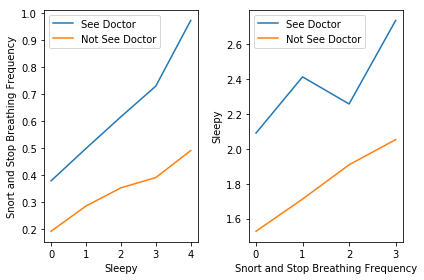

In [10]:
plt.subplot(1,2,1)
plt.plot(seedoctor.groupby('Sleepy')['Snort'].mean())
plt.plot(nodoctor.groupby('Sleepy')['Snort'].mean())
plt.legend(['See Doctor', 'Not See Doctor'])
plt.xlabel('Sleepy')
plt.ylabel('Snort and Stop Breathing Frequency');


plt.subplot(1,2,2)
plt.plot(seedoctor.groupby('Snort')['Sleepy'].mean())
plt.plot(nodoctor.groupby('Snort')['Sleepy'].mean())
plt.legend(['See Doctor', 'Not See Doctor'])
plt.ylabel('Sleepy')
plt.xlabel('Snort and Stop Breathing Frequency')
plt.tight_layout()
plt.show();



# Data Modeling

#### 1. Logistic Regression

Based on the findings from the explanatory analysis, we found that people who came to visit a doctor for sleep disorders behave differently with those who did not visit a doctor for sleeping disorders, especially in Sleepy and Snort frequencies. Therefore, we furthered to analyze the likelihood of people who will consult a doctor for sleeping problems in the future from historical behavioral data using logistic regression. The binary response variable is Doctor, and the predictors are SleepHours, Snore, Sleepy, newSleepTime and newWakeTime.

From the coefficients table and the stem plot below, we were able to see that the relatively significant variables are Sleep and Snort, which confirmed our assumptions from summary statistics in previous sections. 

We also utilized cross-validation for our logistic regression model to confirm the validity of selecction of training and testing data. Overall, we achieved the accuracies of predicting one's preference of seeing a doctor with mean of 76%. 


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

print(SLQ.columns)
X=SLQ.iloc[:,3:].drop('Doctor',axis=1)
y=SLQ.Doctor
print(X.columns)

Index(['Respondent', 'SleepTime', 'WakeTime', 'SleepHours', 'Snore', 'Snort',
       'Doctor', 'Sleepy', 'newSleepTime', 'newWakeTime'],
      dtype='object')
Index(['SleepHours', 'Snore', 'Snort', 'Sleepy', 'newSleepTime',
       'newWakeTime'],
      dtype='object')


In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
logreg=LogisticRegression()
result=logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
acc=np.mean(y_pred==y_test)
print(acc)

0.7740412979351032


In [13]:
W=logreg.coef_[0]
Coef=pd.DataFrame(W, index=X.columns,columns=['Coefficient'])
print(Coef)

              Coefficient
SleepHours      -0.101986
Snore            0.015582
Snort            0.347765
Sleepy           0.428871
newSleepTime    -0.000757
newWakeTime      0.000707


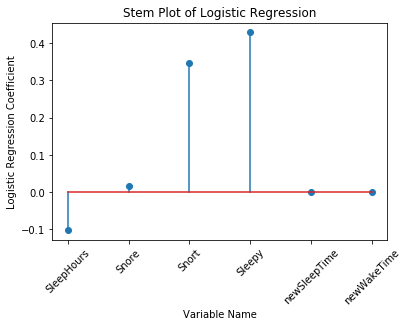

In [14]:
plt.stem(W.ravel())
plt.xticks(np.arange(6),('SleepHours','Snore','Snort','Sleepy','newSleepTime','newWakeTime'),rotation=45)
plt.xlabel('Variable Name')
plt.ylabel('Logistic Regression Coefficient')
plt.title('Stem Plot of Logistic Regression');

In [15]:
reg=LogisticRegression()
cv_scores = cross_val_score(reg,X,y,cv=10)
print(cv_scores)
print(np.mean(cv_scores))

[0.7614841  0.75618375 0.75441696 0.75752212 0.76106195 0.78368794
 0.7570922  0.75531915 0.75531915 0.75      ]
0.7592087316166483


#### 2. K-Means Clustering

So far, we found that Snort and Sleepy were two significant variables to predict the likelihood of visiting a doctor in the future. However, we also expected to look at the present situation because we suspected that there might be people who have a serious sleep problem and need to receive professional treatments from doctors but are unaware of their own status. Therefore, we utilized K-Means to classify people into 4 clusters where each cluster had a typical behavioral patterns and sleeping habits. Below, the line plots of 4 variables (Sleepy, Snore, Snort, Doctor) showed a similar pattern across 4 clusters, implying that they were significant and compatible indicators for sleeping disorders. This finding was consistent with our previous results from the logistic regression. In addition, after examining the behavior of each cluster, we found that people in cluster 2 were at a relatively higher risk of sleep disorders. Hence, we suggested people in cluster 2 to pay more attention to their sleeping to avoid future problems.


In [16]:
from sklearn.cluster import KMeans
print(SLQ.columns)
X=SLQ.iloc[:,4:-2]
print(X.columns)

Index(['Respondent', 'SleepTime', 'WakeTime', 'SleepHours', 'Snore', 'Snort',
       'Doctor', 'Sleepy', 'newSleepTime', 'newWakeTime'],
      dtype='object')
Index(['Snore', 'Snort', 'Doctor', 'Sleepy'], dtype='object')


In [17]:
kmeans=KMeans(n_clusters=4,random_state=2)
kmeans.fit(X)

group=pd.Series(kmeans.labels_,index=SLQ.index)
SLQ['group']=group
summary_stats=SLQ.groupby('group').mean()
summary_stats=summary_stats.drop('Respondent',axis=1)
summary_stats

,SleepHours,Snore,Snort,Doctor,Sleepy,newSleepTime,newWakeTime
group,,,,,,,
0,7.783784,0.571807,0.144144,0.290938,2.605723,2299.416004,676.833598
1,7.607503,2.753639,1.557671,0.449048,2.845465,2317.296753,679.820829
2,7.954172,0.430917,0.121067,0.139535,0.551300,2274.573871,667.854993
3,7.715149,2.494310,0.298009,0.178521,1.128734,2279.958037,648.177098


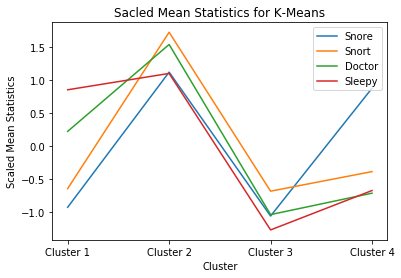

In [18]:
from sklearn.preprocessing import scale
new=scale(summary_stats.iloc[:,1:-2])
plt.plot(new)
plt.legend(['Snore','Snort','Doctor','Sleepy'],loc=1)
plt.xticks(np.arange(4),('Cluster 1','Cluster 2','Cluster 3','Cluster 4'))
plt.xlabel('Cluster')
plt.ylabel('Scaled Mean Statistics')
plt.title('Sacled Mean Statistics for K-Means');

# Reference

Centers for Disease Control and Prevention. (2018). $\textit{National Health and Nutrition Examination Survey}$ [SLQ_I.xpt]. Retrieved from https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/SLQ_I.XPT